In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


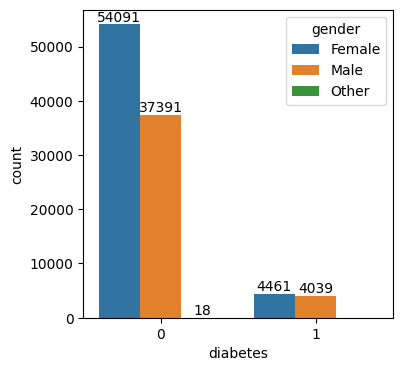

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='diabetes',data=df,hue='gender')
for bars in ax.containers:
  ax.bar_label(bars)


# Number of diabetes patient is almost same for both male and female.But number of female free from diabetis much greater than of male

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
def con(value):
  if value==1:
    return "yes"
  else:
    return "no"

df["diabetes"]=df["diabetes"].apply(con)

# Converting binary values to Yes No value

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,no
1,Female,54.0,0,0,No Info,27.32,6.6,80,no
2,Male,28.0,0,0,never,27.32,5.7,158,no
3,Female,36.0,0,0,current,23.45,5.0,155,no
4,Male,76.0,1,1,current,20.14,4.8,155,no


In [ ]:
Diabetes=df.groupby('diabetes').agg({'diabetes':'count'})

# Making diabetis in a group to see the count and it is 8500 yes and 91500 no

In [ ]:
Diabetes

,diabetes
diabetes,
no,91500
yes,8500


([<matplotlib.patches.Wedge at 0x797ba8dac6d0>,
 [Text(-1.0610131798703932, 0.2902602834376702, 'no'),
  Text(1.0610132002524875, -0.29026020893325244, 'yes')],
 [Text(-0.5787344617474872, 0.15832379096600188, '91.50%'),
  Text(0.578734472864993, -0.1583237503272286, '8.50%')])

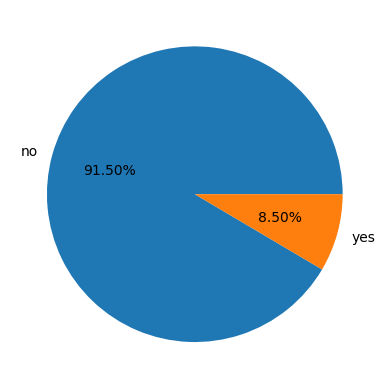

In [ ]:
plt.pie(Diabetes['diabetes'],labels=Diabetes.index,autopct='%1.2f%%')

# 8.5% of peoples are diabetis patient

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000


<Axes: xlabel='age', ylabel='Count'>

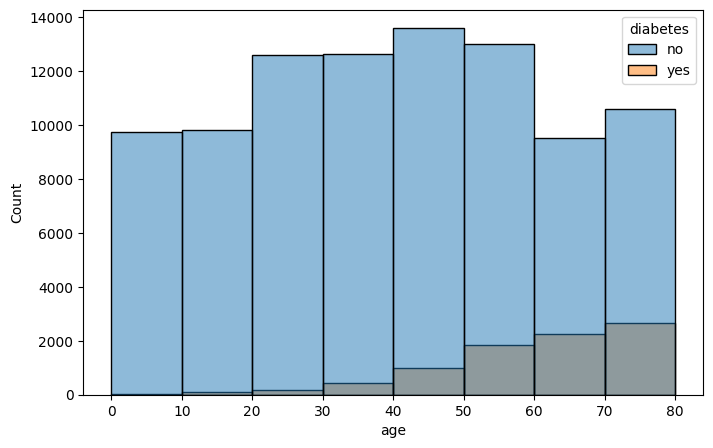

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(x='age',data=df,hue='diabetes',bins=np.arange(0,81,10))

# The people of greater age has more chance of being diabetis patient than that of young aged as the number of diabetis patient has increased gradually by the means of age

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

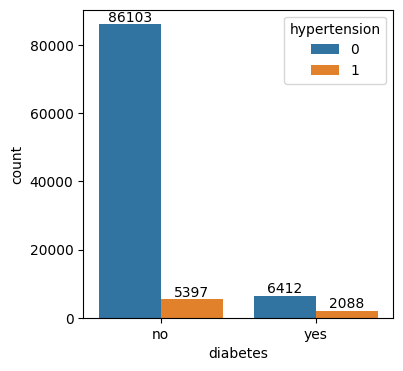

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='diabetes',data=df,hue='hypertension')
for bars in ax.containers:
  ax.bar_label(bars)

# Only a little people have both diabetis and hypertension.One the other hand maximum number of peodle dont have any of them

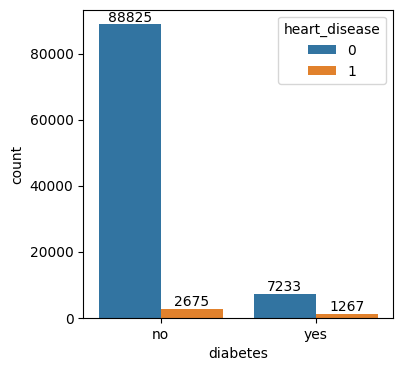

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='diabetes',data=df,hue='heart_disease')
for bars in ax.containers:
  ax.bar_label(bars)

# Heart diseases is also same as hypertension.but the ratio of people who have diabetis but dont have heart diseases is greater than the ratio of people who have diabetis but dont have hypertension.

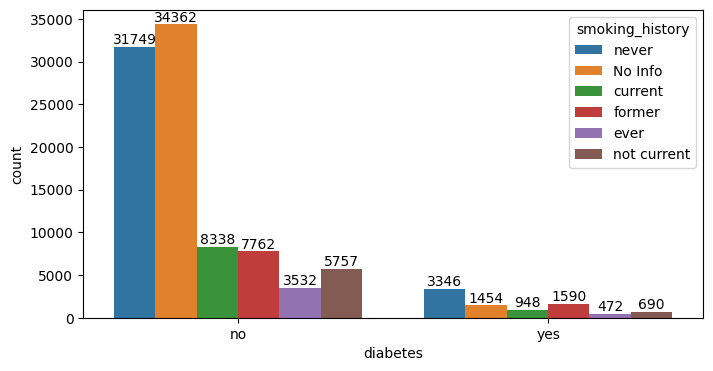

In [ ]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='diabetes',data=df,hue='smoking_history')
for bars in ax.containers:
  ax.bar_label(bars)

# people who dont have any info they are maximum free from diabetis in case of smoking.

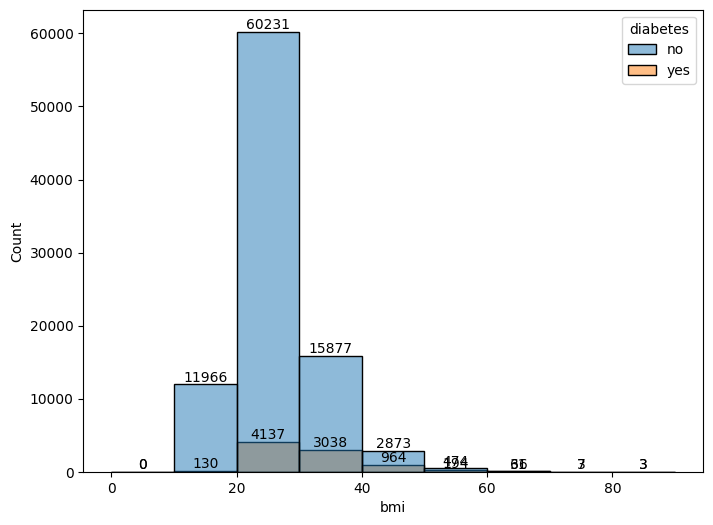

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.histplot(x='bmi',data=df,hue='diabetes',bins=np.arange(0,100,10))
for bars in ax.containers:
  ax.bar_label(bars)

# People of bmi 20 to 30 are the highest number of people dont have diabetis which is 60231 and this bmi group is also highest in numbers who have diabetis and in number it is 4137

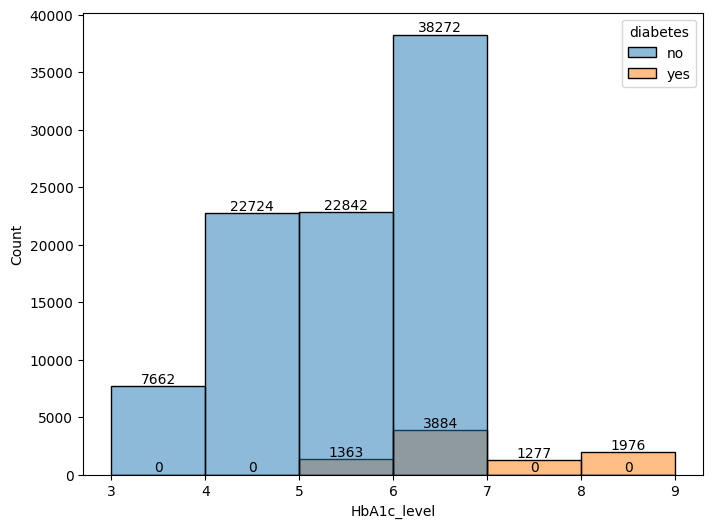

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.histplot(x='HbA1c_level',data=df,hue='diabetes',bins=np.arange(3,10,1))
for bars in ax.containers:
  ax.bar_label(bars)

# People whose HbA1c_level is in range of 7 to 9 ,they must have diabetis

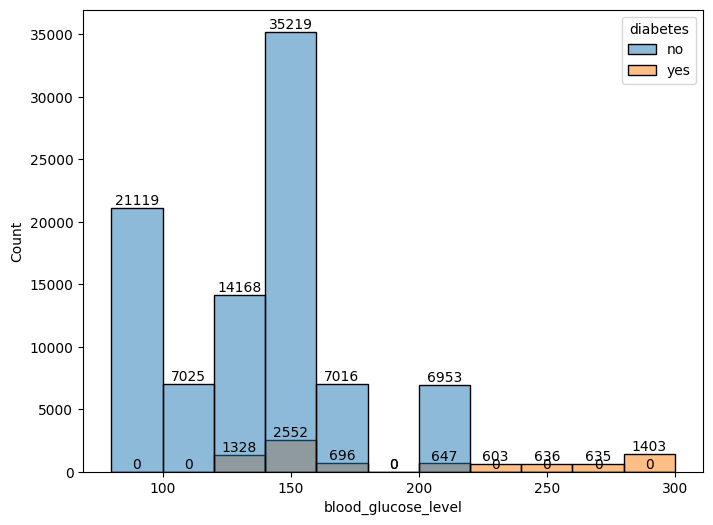

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.histplot(x='blood_glucose_level',data=df,hue='diabetes',bins=np.arange(80,320,20))
for bars in ax.containers:
  ax.bar_label(bars)

# People whose blood_glucose_level is in range of 220 to 300 ,they must have diabetis